# UFRN Analytics

### Análise sobre os dados de Pesquisa

- Bancos de relacionados a <b>Pesquisa</b> no Portal de Dados Abertos da UFRN:


[<b>Pesquisadores:</b>](http://dados.ufrn.br/dataset/pesquisadores) Relação de pesquisadores da UFRN  
[<b>Bolsistas de Iniciação Científica:</b>](http://dados.ufrn.br/dataset/bolsistas-de-iniciacao-cientifica) Relação de bolsistas de iniciação científica de projetos de pesquisa da UFRN  
[<b>Projetos de Pesquisa:</b>](http://dados.ufrn.br/dataset/projetos-de-pesquisa) Relação de projetos de pesquisa realizados na UFRN  
[<b>Grupos de Pesquisa:</b>](http://dados.ufrn.br/dataset/grupos-de-pesquisa) Relação de grupos de pesquisa da UFRN  


- Outros bancos de dados relevantes:

[<b>Docentes:</b>](http://dados.ufrn.br/dataset/docentes/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070) Docentes da UFRN

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import re
%matplotlib inline

In [3]:
pesquisadores = pd.read_csv('pesquisadores.csv',delimiter=';')
pesquisadores.head()

,id_servidor,nome,unidade,centro,coordenador,internos,externos,Unnamed: 7
0,23906,ADA CRISTINA SCUDELARI,DEPARTAMENTO DE ENGENHARIA CIVIL,CENTRO DE TECNOLOGIA,3,1,4,NaN
1,5754609,ADAILDO GOMES D ASSUNCAO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,CENTRO DE TECNOLOGIA,1,0,1,NaN
2,5757049,ADALA NAYANA DE SOUSA MATA,ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO G...,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,1,0,NaN
3,5757114,ADA LIMA FERREIRA DE SOUSA,ESCOLA DE CIÊNCIAS E TECNOLOGIA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,0,1,0,NaN
4,5757842,ADAMO PERRUCCI,DEPARTAMENTO DE DIREITO PROCESSUAL E PROPEDÊUT...,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,0,1,0,NaN


In [4]:
bolsistas = pd.read_csv('bolsistas-de-iniciacao-cientifica.csv',delimiter=';')
bolsistas.head()

,matricula,discente,titulo,codigo_projeto,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status,Unnamed: 15
0,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,2008,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2008-2009,2008-08-25,2008-11-06 13:35:24.877,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
1,200504593,ABDON SILVA RIBEIRO DA CUNHA,ELEMENTOS DO COMPORTAMENTO ORGANIZACIONAL:Tipo...,PVE513-2008,2008,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Gestão de Organizações Sociais;Trabalho Volunt...,GRUPO DE ESTUDOS E PESQUISAS EM GESTÃO INSTITU...,2008-2009,2008-11-06,2009-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
2,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,2007,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2007-2008,2007-08-01,2008-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
3,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,2009,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,2009-2010,2009-08-01,2009-12-25 00:00:00,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
4,2011049415,ABEL LUIS DA SILVA NETO,Estudo de Antenas com Reflectarrays e suas Apl...,PVG6992-2013,2013,ADAILDO GOMES D ASSUNCAO,Iniciação Tecnológica (IT),PIBIT,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",GRUPO DE MICROONDAS E ANTENAS,2013-2014,2013-08-14,2014-06-26 00:00:00,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES - DCO,PENDENTE DE RELATORIO,NaN


In [5]:
projetos = pd.read_csv('projetos-de-pesquisa.csv',delimiter='\";\"')

def correct (word):
    word=str(word)
    return word.replace('\";',"").replace("\"","")

projetos['area_conhecimento_cnpq'] = projetos['area_conhecimento_cnpq";'].apply(correct)
projetos['codigo_projeto'] = projetos['"codigo_projeto'].apply(correct)

projetos.drop(['"codigo_projeto', 'area_conhecimento_cnpq";'], axis=1, inplace=True)

import datetime as dt
projetos['ano'] = pd.to_datetime(projetos['ano']).dt.year

projetos.head()

/home/ycaro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq,codigo_projeto
0,Processos e Propriedades em Reservatórios Carb...,"Carbonatos, Reservatórios, Fraturados,",EM EXECUÇÃO,2018.0,2018-01-01,2021-12-31,EXTERNO,DEPARTAMENTO DE GEOLOGIA,FRANCISCO HILARIO REGO BEZERRA,NaN,SISTEMAS PETROLÍFEROS,Estudos Geológicos das Bacias Sedimentares,Sedimentologia,PVB14922-2018
1,Gerenciador Inteligente de Instalações Elétric...,"Instalações elétricas, IoT, Edifícios Intelige...",EM EXECUÇÃO,2017.0,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,JOSE LUIZ DA SILVA JUNIOR,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Sistemas embarcados aplicados,Automação Eletrônica de Processos Elétricos e ...,PIG14434-2017
2,Sistema inteligente para bicicletas (smart bykes),"Sistema Inteligente, bicicletas, LoRaWan, Sist...",EM EXECUÇÃO,2017.0,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,JOSE ALBERTO NICOLAU DE OLIVEIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Sistemas embarcados aplicados,Circuitos Eletrônicos,PIG14470-2017
3,Síntese de blocos de RF integrados para aplica...,"Circuitos Integrados de Rádio-Frequência, Padr...",EM EXECUÇÃO,2017.0,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,VINCENT PATRICK MARIE BOURGUET,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Microeletrônica aplicada,Circuitos Eletrônicos,PIG14713-2017
4,Resgate da biodiversidade de maxixeiro: Coleta...,recursos genéticos vegetais; germoplasma; cucu...,EM EXECUÇÃO,2017.0,2017-08-01,2018-07-31,INTERNO,ESCOLA AGRÍCOLA DE JUNDIAÍ,JOSE HAMILTON DA COSTA FILHO,(2016) Edital N° 05/2016 - Edital para cadastr...,Recursos Genéticos Vegetais,Biodiversidade e Recursos Genéticos Vegetais,Melhoramento Vegetal,PII14130-2017


In [6]:
grupos = pd.read_csv('grupos-de-pesquisa.csv',delimiter=';')
grupos.head()

,codigo,base_pesquisa,coordenador,area_conhecimento_cnpq,situacao,Unnamed: 5
0,GED239-10,Ações promocionais e de atenção a grupos human...,FRANCISCO ARNOLDO NUNES DE MIRANDA,Enfermagem,EM CONSOLIDACÃO,NaN
1,GCG111-04,AGROECOLOGIA E DESENVOLVIMENTO SUSTENTÁVEL NO ...,MAGDA MARIA GUILHERMINO,Zootecnia,CONSOLIDADO,NaN
2,GCD109-01,"ALIMENTOS, NUTRIÇÃO E SAÚDE",KARINE CAVALCANTI MAURICIO DE SENA EVANGELISTA,Nutrição,CONSOLIDADO,NaN
3,GEA282-12,"Alterações morfológicas, modulação farmacêutic...",RAIMUNDO FERNANDES DE ARAUJO JUNIOR,Morfologia,EM CONSOLIDACÃO,NaN
4,GEE404-16,"Ambiente, Turismo e Sustentabilidade",KETTRIN FARIAS BEM MARACAJA,Turismo,EM CONSOLIDACÃO,NaN


In [7]:
docentes = pd.read_csv('docentes.csv',delimiter=';')
docentes.head()

,siape,nome,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,lotacao,admissao,Unnamed: 8
0,709857,MARIA NUBIA PESSOA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO DE EX-TERRITORIO,D ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2010-01-06 00:00:00,NaN
1,713506,RUTILENE SANTOS DE SOUSA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO DE EX-TERRITORIO,D ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2009-03-12 00:00:00,NaN
2,709496,ADAUTO CHIAMENTI,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DV ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1988-03-01 00:00:00,NaN
3,1543339,ADELE GUIMARAES UBARANA SANTOS,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006-07-24 00:00:00,NaN
4,1554468,AFRANIO CESAR DE ARAUJO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008-09-12 00:00:00,NaN


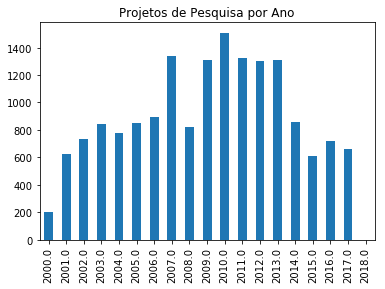

In [8]:
projetos['ano'].value_counts().sort_index().plot(kind='bar', title="Projetos de Pesquisa por Ano")

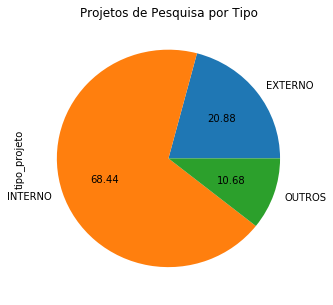

In [9]:
def func_tipo(tipo):
    tipo=str(tipo)
    if ((tipo!='INTERNO') & (tipo!='EXTERNO')):
        tipo='OUTROS'
    return tipo
projetos['tipo_projeto'].apply(func_tipo).value_counts().sort_index().plot(kind='pie', autopct='%.2f', figsize=(5,5), title="Projetos de Pesquisa por Tipo")

In [ ]:
grandes_areas_cnpq.loc[grandes_areas_cnpq['Nome']=='Lógica Matemática','Grande Área']

In [ ]:
grandes_areas_cnpq = pd.read_excel('TabeladeAreasdoConhecimento.xls')
def func_grande_area_cnpq(area):
    tipo=str(area)
    return grandes_areas_cnpq[grandes_areas_cnpq['Nome']==area]['Grande Área']



grupos['area_conhecimento_cnpq'].apply(func_grande_area_cnpq).value_counts().plot(kind='bar', figsize=(20,10), title="Grupos de Pesquisa por Área do Conhecimento")

In [ ]:
grandes_areas_cnpq.iloc[0,1]

In [ ]:
projetos['unidade'].value_counts()[projetos['unidade'].value_counts()>10].plot(kind='bar', figsize=(20,10), title="Projetos de Pesquisa por Unidade\n(apenas unidades com mais de 10 projetos registrados)")

In [ ]:
bolsistas.groupby('ano').count()['matricula'].plot(kind='bar', title='Bolsistas de IC por Ano')

In [ ]:
projetos[projetos['ano']==dt.datetime(2017,1,1).year]['unidade'].value_counts()[projetos['unidade'].value_counts()>10].plot(kind='bar', figsize=(20,10), title="Projetos de Pesquisa por Unidade em 2017")

In [ ]:
from collections import Counter
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopw = set(stopwords.words('portuguese'))
stopw.add("none")
#from string import digits
text = projetos['palavras_chave'].to_string().lower()

text = ' '.join([word for word in text.split() if word not in stopw])

text = ''.join(i for i in text if not i.isdigit())
#text = ''.join(ch for ch in text if ch not in set(string.punctuation))
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
text = text.translate(translator)
text = text.split()

text_dict = Counter(text)

# WordCloud module: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', height=1000, width=2500).generate_from_frequencies(text_dict)
plt.figure(1,[100,250])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
Classificar departamentos pelo indice: numero de projetos/numero de docentes
Classificar departamentos pelo percentual de docentes coordenando projeto de pesquisa
em execuçao
desde 2010
sempre

In [11]:
pesquisadores[pesquisadores['nome']=='ADAILDO GOMES D ASSUNCAO']

,id_servidor,nome,unidade,centro,coordenador,internos,externos,Unnamed: 7
1,5754609,ADAILDO GOMES D ASSUNCAO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,CENTRO DE TECNOLOGIA,1,0,1,NaN


In [12]:
projetos[projetos['coordenador']=='ADAILDO GOMES D ASSUNCAO']

,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq,codigo_projeto
4257,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2013.0,2016-08-01,2019-07-31,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2013
5716,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2012.0,2012-08-01,2013-07-31,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2012
7093,Desenvolvimento de FSS e Reflectarrays Fractai...,"Superfícies Seletivas de Frequência, FSS, Refl...",EM EXECUÇÃO,2011.0,2011-08-01,2012-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,(2011) Edital PIBIC/PIBIC-AA/PIBITI-2011-2012,GRUPO DE MICROONDAS E ANTENAS,Antenas Integradas para Sistemas de Comunicações,Telecomunicações,PVG4791-2011
7168,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2011.0,2010-03-01,2015-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2011
8833,Desenvolvimento de FSS e Reflectarrays Fractai...,"Superfícies Seletivas de Frequência, FSS, Refl...",RENOVADO,2010.0,2010-01-01,2010-12-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,(2010) EDITAL PROPESQ 02/2010,GRUPO DE MICROONDAS E ANTENAS,Antenas Integradas para Sistemas de Comunicações,Telecomunicações,PVG4791-2010
10275,DESENVOLVIMENTO DE CIRCUITOS PLANARES E CARACT...,"Antenas, comunicações sem fio, propagação, FSS...",EM EXECUÇÃO,2009.0,2007-03-01,2010-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2047-2009
11214,DESENVOLVIMENTO DE CIRCUITOS PLANARES E CARACT...,"Antenas, comunicações sem fio, propagação, FSS...",RENOVADO,2008.0,2007-03-01,2010-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2047-2008
11215,DESENVOLVIMENTO DE CIRCUITOS E CARACTERIZAÇÃO ...,propagacao e comunicacoes sem fio; Antenas; FSS,FINALIZADO,2008.0,2006-10-01,2008-09-30,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2048-2008
11216,Sistemas Inteligentes de Supervisão e Controle...,Sistemas em Chip; Sistemas de Controle e Supe...,FINALIZADO,2008.0,2006-12-01,2008-11-30,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"antenas, microondas",Automação Eletrônica de Processos Elétricos e ...,PVG2049-2008
13595,"DESENVOLVIMENTO DE ANTENAS, CIRCUITOS PLANARES...",ANTENAS INTEGRADAS;PROPAGAÇÃO;COMUNICAÇÕES MÓVEIS,FINALIZADO,2006.0,2006-08-01,2008-07-01,EXTERNO,CT VICE-DIRETORIA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"antenas, microondas",Telecomunicações,PVG341-2006
